In [3]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

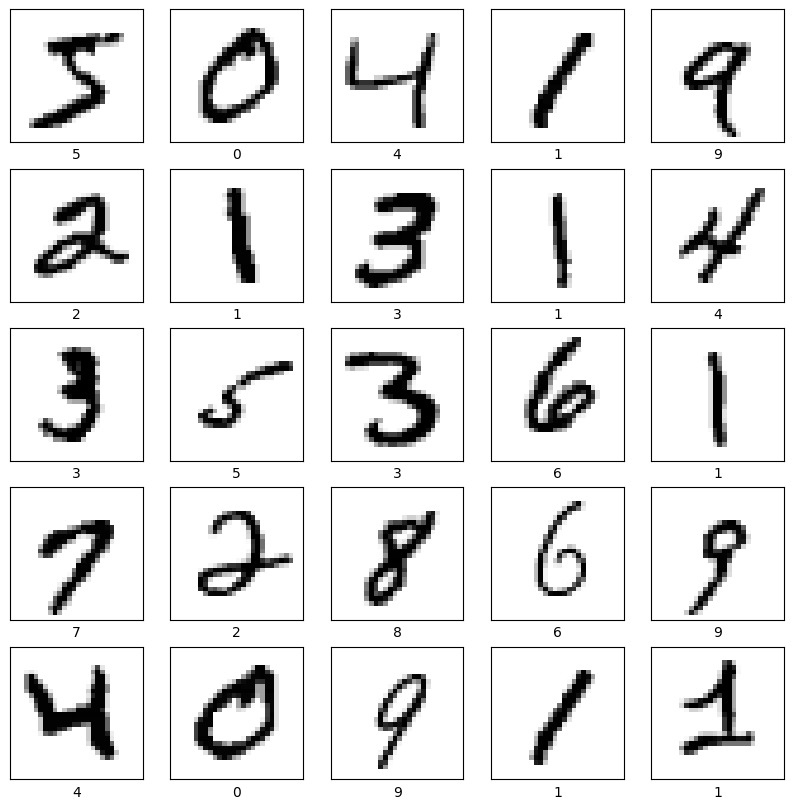

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show( )

In [5]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [6]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [7]:
from keras import models
from keras import layers
# Визначення типу моделі
network = models.Sequential()
# Визначення прихованого шару
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))

C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
network.compile (optimizer = 'rmsprop', loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [9]:
network.fit(train_images, train_labels, epochs = 6, batch_size = 128)

Epoch 1/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8756 - loss: 0.4321    
Epoch 2/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9651 - loss: 0.1215 
Epoch 3/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9784 - loss: 0.0732 
Epoch 4/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9850 - loss: 0.0521 
Epoch 5/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9890 - loss: 0.0377 
Epoch 6/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9919 - loss: 0.0280 


In [10]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 789us/step - accuracy: 0.9747 - loss: 0.0755


In [11]:
network.save('my_model.keras')

In [12]:
from keras.models import load_model
model = load_model('my_model.keras')

In [13]:
import cv2
import numpy as np

# Назви зображень
images = ['four.png', 'one.png', 'six.png', 'two.png', 'seven.png']

for name in images:
    # Читання зображення у відтінках сірого
    original = cv2.imread(name, 0)

    # Зміна кольору на зворотній
    modified = cv2.bitwise_not(original)

    # Приведення розміру до 28x28
    resized_img = cv2.resize(modified, (28, 28))

    # Підготовка до передбачення
    vector = resized_img.flatten().astype('float32') / 255
    vector = vector.reshape(1, -1)

    # Отримання передбачення
    output = model.predict(vector)[0]
    result = np.argmax(output)

    # Вивід результату
    print(f"{name} -> Модель визначила: {result}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
four.png -> Модель визначила: 4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
one.png -> Модель визначила: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
six.png -> Модель визначила: 6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
two.png -> Модель визначила: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
seven.png -> Модель визначила: 7


# Завдання 2

In [60]:
from keras.src.datasets import mnist, cifar10, fashion_mnist
(train_images_2, train_labels_2), (test_images_2, test_labels_2) = cifar10.load_data()

In [61]:
category_names = ['plane','car','bird','cat','deer','dog','frog','horse','ship','truck']

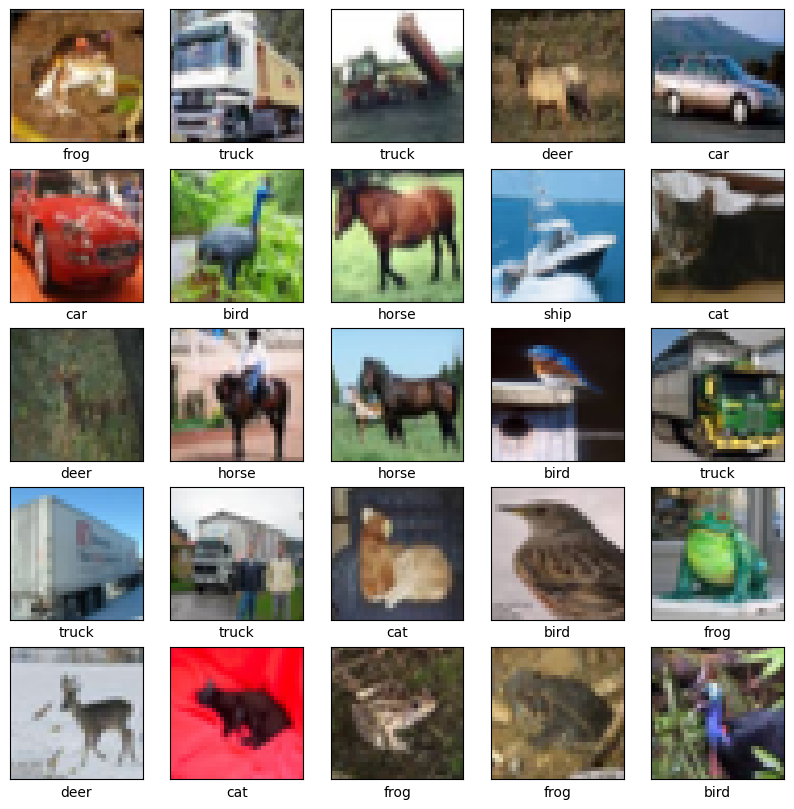

In [62]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images_2[i], cmap=plt.cm.binary)
    plt.xlabel(category_names[int(train_labels_2[i].item())])
plt.show( )

In [63]:
train_images_2 = train_images_2.astype('float32') / 255
test_images_2 = test_images_2.astype('float32') / 255

In [64]:
from tensorflow.keras import models, layers
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import BatchNormalization, Dropout
cifar2 = models.Sequential([
    Input(shape=(32, 32, 3)),
    
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    Dropout(0.25),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    Dropout(0.25),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

In [72]:
def show_acc(model_2, test_images_2, test_labels_2):
    model_2.compile(optimizer=Adam(learning_rate=1e-3),
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])
    history = model_2.fit(train_images_2, train_labels_2,
                          epochs=25, batch_size=64, validation_split=0.2)

    test_loss, test_acc = model_2.evaluate(test_images_2, test_labels_2)
    print(f"Точність на тестових даних: {test_acc:.4f}")

    # Графіки
    plt.plot(history.history['accuracy'], label='Train accuracy')
    plt.plot(history.history['val_accuracy'], label='Val accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(); plt.grid(True); plt.show()

  

Epoch 1/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.7828 - loss: 0.6100 - val_accuracy: 0.7388 - val_loss: 0.7610
Epoch 2/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.7890 - loss: 0.5865 - val_accuracy: 0.6859 - val_loss: 0.9855
Epoch 3/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.7936 - loss: 0.5939 - val_accuracy: 0.7286 - val_loss: 0.7941
Epoch 4/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.7938 - loss: 0.5785 - val_accuracy: 0.7430 - val_loss: 0.7551
Epoch 5/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.7982 - loss: 0.5726 - val_accuracy: 0.7466 - val_loss: 0.7430
Epoch 6/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.8014 - loss: 0.5634 - val_accuracy: 0.7293 - val_loss: 0.8096
Epoch 7/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.8030 - loss: 0.5567 - val_accuracy: 0.7275 - val_loss: 0.8347
Epoch 8/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.7977 - loss: 0.5551 - val_acc

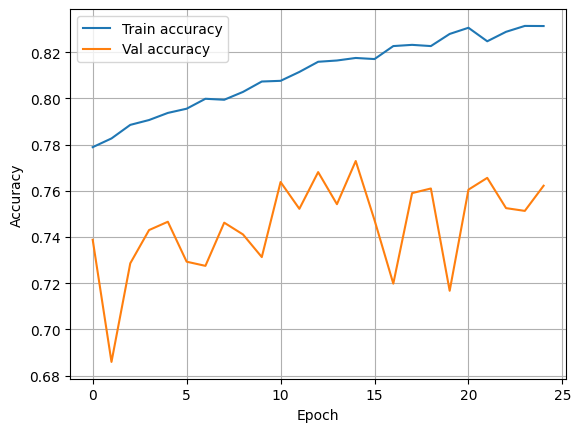

In [73]:
from tensorflow.keras.optimizers import Adam
show_acc(cifar2, test_images_2, test_labels_2)

In [80]:
# Збереження моделі
cifar2.save("cifar10_model.keras")


In [81]:
from tensorflow.keras.models import load_model

# Завантаження збереженої моделі
model_3 = load_model("cifar10_model.keras")

In [82]:
# Список файлів, які хочеш перевірити
filenames = ["truck.png", "horse.png", "bird.png", "deer.png", "ship.png", "ship2.png", "frog1.png", "frog2.png", "plane.png", ]  
# Перевірка кожного файлу
for filename in filenames:
    # Завантаження і підготовка
    img = cv2.imread(filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_resized = cv2.resize(img, (32, 32))
    img_array = img_resized.astype("float32") / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Прогноз
    pred = model_3.predict(img_array)
    predicted_label = category_names[np.argmax(pred)]

    # Вивід
    print(f"Файл {filename} - Модель розпізнала: {predicted_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Файл truck.png - Модель розпізнала: truck
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Файл horse.png - Модель розпізнала: horse
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Файл bird.png - Модель розпізнала: bird
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Файл deer.png - Модель розпізнала: deer
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Файл ship.png - Модель розпізнала: ship
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Файл ship2.png - Модель розпізнала: ship
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Файл frog1.png - Модель розпізнала: frog
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Файл frog2.png - Модель розпізнала: frog
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Файл plane.png - Модель розпізнала: plane


# Завдання 3

In [24]:
from keras.datasets import fashion_mnist
(train_images_3, train_labels_3), (test_images_3, test_labels_3) = fashion_mnist.load_data()

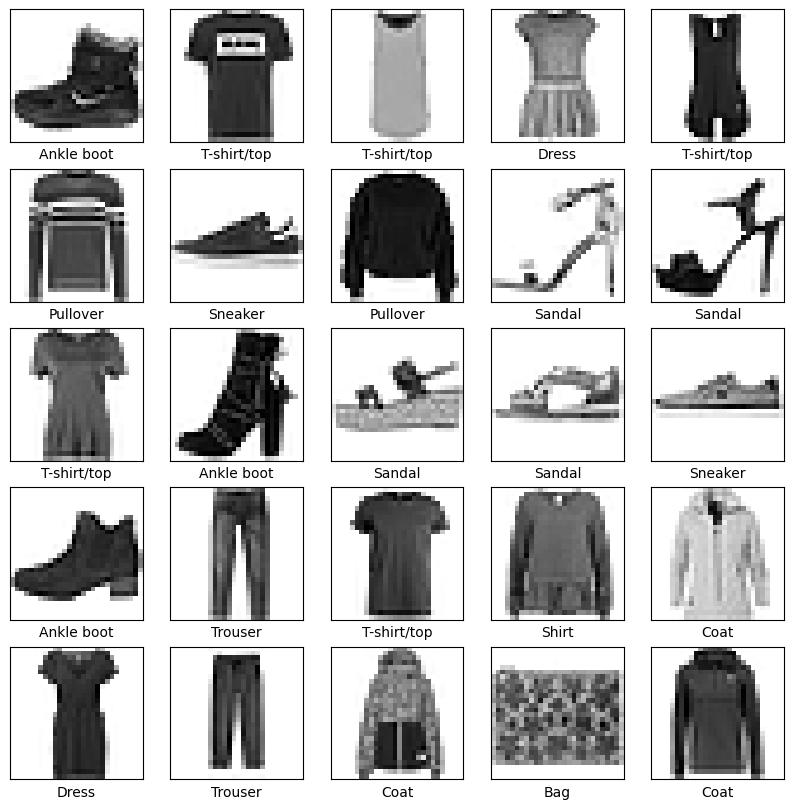

In [25]:
# Назви категорій
category_names_fmnist = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                         'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Візуалізація
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([]); plt.yticks([]); plt.grid(False)
    plt.imshow(train_images_3[i], cmap=plt.cm.binary)
    plt.xlabel(category_names_fmnist[train_labels_3[i]])
plt.show()

In [26]:
# Підготовка зображень
train_images_3 = train_images_3.reshape((60000, 28, 28, 1)).astype("float32") / 255
test_images_3 = test_images_3.reshape((10000, 28, 28, 1)).astype("float32") / 255

In [54]:
# Побудова моделі
from tensorflow.keras import models, layers
from tensorflow.keras.layers import BatchNormalization, Dropout, Input
from tensorflow.keras.optimizers import Adam

fmnist_model = models.Sequential([
    Input(shape=(28, 28, 1)),

    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    Dropout(0.25),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    Dropout(0.25),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    layers.Dense(10, activation='softmax')
])


In [76]:
# Навчання та оцінка
def show_acc_fmnist(model, test_images, test_labels):
    model.compile(optimizer=Adam(learning_rate=1e-3),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    history = model.fit(train_images_3, train_labels_3,
                        epochs=30, batch_size=64, validation_split=0.2)

    test_loss, test_acc = model.evaluate(test_images, test_labels)
    print(f"Точність на тестових даних: {test_acc:.4f}")

    # Графіки
    plt.plot(history.history['accuracy'], label='Train accuracy')
    plt.plot(history.history['val_accuracy'], label='Val accuracy')
    plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.grid(True); plt.legend()
    plt.show()

Epoch 1/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9377 - loss: 0.1732 - val_accuracy: 0.9289 - val_loss: 0.2035
Epoch 2/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.9377 - loss: 0.1683 - val_accuracy: 0.9257 - val_loss: 0.2080
Epoch 3/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.9378 - loss: 0.1648 - val_accuracy: 0.9136 - val_loss: 0.2397
Epoch 4/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9398 - loss: 0.1629 - val_accuracy: 0.9208 - val_loss: 0.2227
Epoch 5/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9409 - loss: 0.1571 - val_accuracy: 0.9202 - val_loss: 0.2378
Epoch 6/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9412 - loss: 0.1562 - val_accuracy: 0.9326 - val_loss: 0.1924
Epoch 7/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9448 - loss: 0.1484 - val_accuracy: 0.9305 - val_loss: 0.1956
Epoch 8/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.9409 - loss: 0.1568 - val_accu

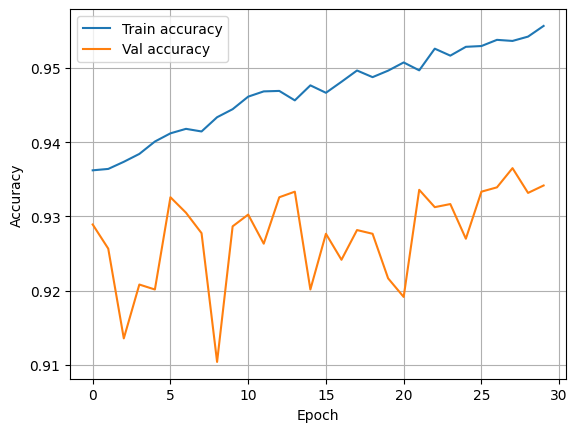

In [77]:
# Виклик функції навчання
show_acc_fmnist(fmnist_model, test_images_3, test_labels_3)


In [78]:
# Збереження моделі
fmnist_model.save("fashion_mnist_model.keras")


In [79]:
# Завантаження і перевірка зовнішніх зображень
from tensorflow.keras.models import load_model
import cv2
import numpy as np

model_fmnist_loaded = load_model("fashion_mnist_model.keras")

def preprocess_external_image(filename):
    img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (28, 28))
    img = cv2.bitwise_not(img)  # Якщо фон чорний, а об'єкт білий
    img = img.astype("float32") / 255.0
    img = np.expand_dims(img, axis=(0, -1))
    return img

# Приклади зображень
filenames_fmnist = ["ankle boot.png", "bag.png", "coat.png", "dress.png", "t-shirt.png"] 

for filename in filenames_fmnist:
    img_ready = preprocess_external_image(filename)
    pred = model_fmnist_loaded.predict(img_ready)
    predicted_label = category_names_fmnist[np.argmax(pred)]
    print(f"Файл {filename} - Модель розпізнала: {predicted_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Файл ankle boot.png - Модель розпізнала: Bag
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Файл bag.png - Модель розпізнала: Bag
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Файл coat.png - Модель розпізнала: Coat
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Файл dress.png - Модель розпізнала: Dress
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Файл t-shirt.png - Модель розпізнала: T-shirt/top
